In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer# converting text
from sklearn.linear_model import LogisticRegression 

In [2]:
df=pd.read_csv(r"C:\Users\AMON\Downloads\email spam.zip")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
print(df.dtypes)

Category    object
Message     object
dtype: object


In [4]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [5]:
df['label']=df['Category'].map({'ham':0,'spam':1})

In [9]:
X=df['Message']# input data model will learn from
y=df['label']# outpy
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
vectorizer=TfidfVectorizer() # loading the model
X_train_vec=vectorizer.fit_transform(X_train)
X_test_vec=vectorizer.transform(X_test) 

In [37]:
model=LogisticRegression(max_iter=1000,class_weight='balanced')# max_iter=1000 gives the model more time to find a solution
model.fit(X_train_vec,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [38]:
y_pred=model.predict(X_test_vec)
accuracy=accuracy_score(y_pred,y_test)
print("Accurary Score",accuracy)

Accurary Score 0.9829596412556054


In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

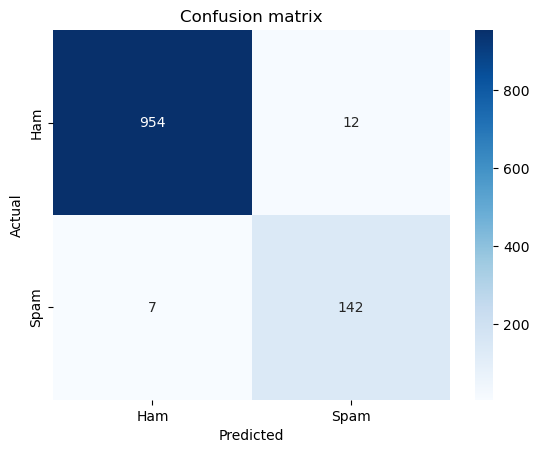

In [40]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',
            cmap='Blues',xticklabels=['Ham','Spam'],
            yticklabels=['Ham','Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion matrix")
plt.show()

In [41]:
from sklearn.metrics import precision_score
m=precision_score(y_pred,y_test)
print("Precision SCORE",m)

Precision SCORE 0.9530201342281879


In [42]:
msg=['Congratulations you have won a free iPhone.Click here now']
vec=vectorizer.transform(msg)
print(model.predict(vec))

[1]


In [43]:
df['label'].value_counts()

label
0    4825
1     747
Name: count, dtype: int64

In [44]:

import joblib
joblib.dump(model,'email_spam_detection.pkl') # save the model to a file


joblib.dump(vectorizer,'vectorizer.pkl')



['vectorizer.pkl']

In [ ]:
from flask import Flask,request,render_template
import joblib
model=joblib.load('email_spam_detection.pkl')
vectorizer=joblib.load('vectorizer.pkl')

app=Flask(__name__)
@app.route('/')
def home():
    return render_template('form.html')


@app.route('/predict-web',methods=['POST'])
def predict_web():
    message=request.form['message']
    message_vec=vectorizer.transform([message])
    prediction=model.predict(message_vec)[0]
    label="spam" if prediction == 1 else "ham"
    return render_template('result.html',message=message,prediction=label)


if __name__ == '__main__':
    app.run()
                          

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [18/Jul/2025 06:28:42] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Jul/2025 06:29:03] "POST /predict-web HTTP/1.1" 200 -
127.0.0.1 - - [18/Jul/2025 06:30:03] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Jul/2025 06:31:34] "POST /predict-web HTTP/1.1" 200 -
127.0.0.1 - - [18/Jul/2025 06:31:49] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Jul/2025 06:32:44] "POST /predict-web HTTP/1.1" 200 -
127.0.0.1 - - [18/Jul/2025 06:32:48] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Jul/2025 06:33:41] "POST /predict-web HTTP/1.1" 200 -
127.0.0.1 - - [18/Jul/2025 06:41:09] "GET / HTTP/1.1" 200 -
